In [1]:
from graphviz import Digraph

<class 'graphviz.dot.Digraph'>


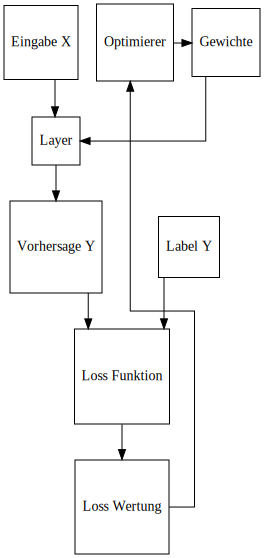

In [2]:
g = Digraph('G',)
def layer(dot, text, name=None, shape='square'):
    if not name:
        name = 'node'
    dot.node(name,text)

g.attr('node', shape='square')
g.attr(compound='true')
g.attr(splines='ortho')

g.node('I', 'Eingabe X')
g.node('y', 'Label Y')

g.node('opt', 'Optimierer', constraint='false')
g.node('w', 'Gewichte',constraint='false')

with g.subgraph(name='net') as c:
    print(type(g))
    c.node('L', 'Layer')
    c.node('yHat', 'Vorhersage Y')

    c.edges(['IL',  ('L','yHat')])

with g.subgraph(name='eval') as c:    
    c.node('lossf', 'Loss Funktion')
    c.node('loss', 'Loss Wertung')
    c.edge('lossf', 'loss')

g.edges([('yHat', 'lossf')])
g.edges([('y', 'lossf')])

g.edge('loss', 'opt', constraint='false')
g.edge('opt', 'w', constraint='false')
g.edge('w', 'L')
g